In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from helpers.clear_data import clear_data
from helpers.enrich_data import enrich_data, enriched_column_names
from helpers.get_data import get_data
from helpers.mapper import mapper

data = get_data(r'C:\Users\rodri\OneDrive\Documentos\Repos\rBressanS\projeto-aplicado\data')
data['driver_a']['route_a']['trip_1'].head()


,time,Aceleração (m/s²),Altitude (GPS) (m),Distância percorrida (km),Distância percorrida (total) (km),Espaço livre no tanque de combustível (L),Nível de combustível (%) (%),Nível de combustível (V) (L),Posição do pedal do acelerador D (%),Posição do pedal do acelerador E (%),...,RPM do motor x1000 (rpm),Temperatura do líquido de \r\narrefecimento do motor (℃),Velocidade (GPS) (km/h),Velocidade do veículo (km/h),Velocidade média (km/h),Velocidade média (GPS) (km/h),Latitude,Longtitude,Unnamed: 19,file
time,,,,,,,,,,,,,,,,,,,,,
1900-01-01 19:32:20,19:32:24.282,NaN,799.126881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,0.000015,-23.556263,-46.896093,NaN,data_1.csv
1900-01-01 19:32:25,19:32:29.820,NaN,811.105744,0.00000,35.041601,38.5,23.0,11.5,20.0,9.0,...,1.0,88.0,3.678464,0.0,NaN,0.025677,-23.556227,-46.896099,NaN,data_1.csv
1900-01-01 19:32:30,19:32:34.930,0.000000,815.000000,0.00000,35.041601,38.5,23.0,11.5,20.0,9.0,...,0.8,87.0,0.000000,0.0,0.000000,0.460593,-23.556204,-46.896175,NaN,data_1.csv
1900-01-01 19:32:35,19:32:39.850,0.000000,808.822893,0.00000,35.041601,39.0,22.0,11.0,20.0,9.0,...,0.8,87.0,0.000000,0.0,0.000000,0.369647,-23.556274,-46.896117,NaN,data_1.csv
1900-01-01 19:32:40,19:32:44.970,0.127958,808.662864,0.00065,35.042250,39.0,22.0,11.0,20.0,9.0,...,0.8,87.0,0.000000,2.0,0.154407,0.283889,-23.556274,-46.896117,NaN,data_1.csv


In [3]:
clean_data = mapper(clear_data, data)
enriched_data = mapper(enrich_data, clean_data)
df: pd.DataFrame = None
for driver in enriched_data:
    for route in enriched_data[driver]:
        for trip_name in enriched_data[driver][route]:
            trip = enriched_data[driver][route][trip_name]
            trip["driver"] = driver
            trip["route"] = route
            trip["trip"] = trip_name
            if df is None:
                df = trip
            else:
                df = pd.concat([df, trip])

<Axes: title={'center': 'aceleracao_calculada_absoluta'}, xlabel='[driver]'>

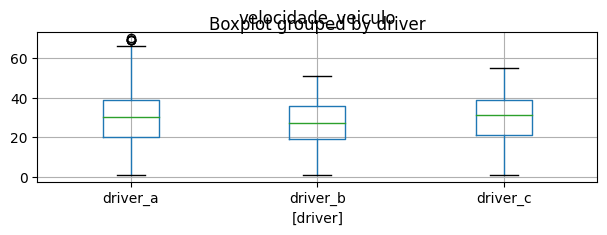

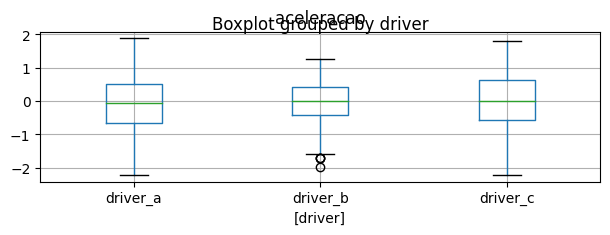

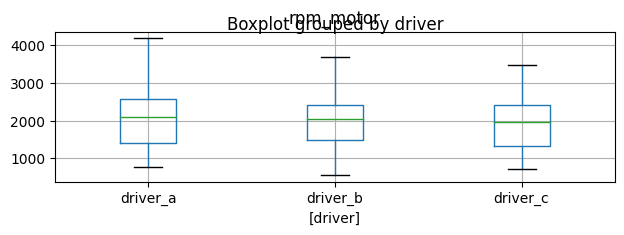

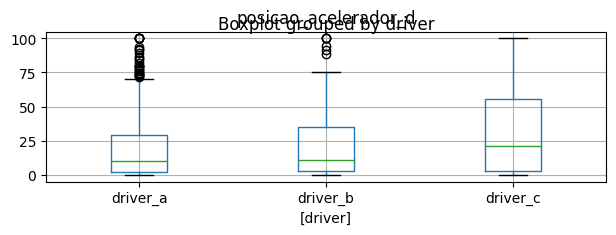

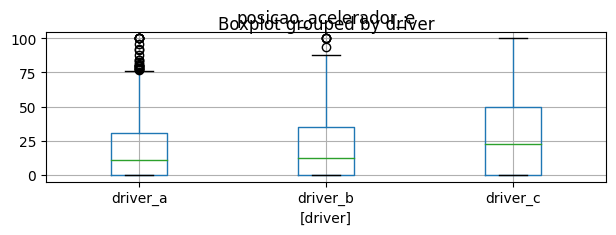

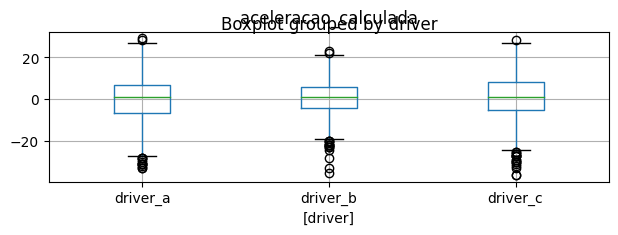

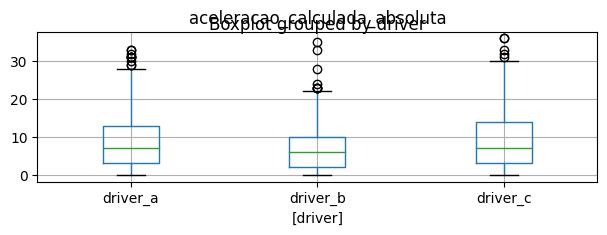

In [4]:
df.boxplot(column=[enriched_column_names.velocidade_veiculo], by=['driver'], figsize=(7,2),)
df.boxplot(column=[enriched_column_names.aceleracao], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.rpm_motor], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.posicao_acelerador_d], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.posicao_acelerador_e], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.aceleracao_calculada], by=['driver'], figsize=(7,2))
df.boxplot(column=[enriched_column_names.aceleracao_calculada_absoluta], by=['driver'], figsize=(7,2))

In [5]:
from helpers.aggregate_data import agg_data

aggregated_data = mapper(agg_data, enriched_data)

In [6]:
df_agg: pd.DataFrame = None
for driver in aggregated_data:
    for route in aggregated_data[driver]:
        for trip_name in aggregated_data[driver][route]:
            trip = aggregated_data[driver][route][trip_name]
            trip["driver"] = driver
            # trip["route"] = route
            # trip["trip"] = trip_name
            if df_agg is None:
                df_agg = trip
            else:
                df_agg = pd.concat([df_agg, trip])

df_agg

statistic_variable,aceleracao_calculada_min,aceleracao_calculada_max,aceleracao_calculada_mean,aceleracao_calculada_std,aceleracao_calculada_q1,aceleracao_calculada_q2,aceleracao_calculada_q3,aceleracao_calculada_absoluta_min,aceleracao_calculada_absoluta_max,aceleracao_calculada_absoluta_mean,...,rpm_motor_q3,velocidade_veiculo_min,velocidade_veiculo_max,velocidade_veiculo_mean,velocidade_veiculo_std,velocidade_veiculo_q1,velocidade_veiculo_q2,velocidade_veiculo_q3,aceleracao_brusca_por_periodo,driver
value,-22.0,24.0,0.220000,9.494860,-6.0,1.0,6.25,0.0,24.0,7.700000,...,2491.0,2.0,54.0,28.725000,11.785750,20.0,31.0,38.25,0.124378,driver_a
value,-33.0,27.0,0.415385,10.992348,-5.0,1.0,6.50,0.0,33.0,8.271795,...,2644.5,1.0,62.0,29.487179,13.216032,20.0,30.0,39.00,0.168367,driver_a
value,-33.0,29.0,0.344948,12.575763,-8.0,2.0,9.00,0.0,33.0,10.017422,...,2833.5,1.0,70.0,34.198606,15.508139,23.0,33.0,45.50,0.239583,driver_a
value,-31.0,25.0,0.189542,11.472938,-7.0,2.0,9.00,0.0,31.0,9.261438,...,2445.0,1.0,51.0,25.758170,12.335244,15.0,26.0,37.00,0.187097,driver_a
value,-28.0,20.0,0.196653,9.764831,-5.5,1.0,6.00,0.0,28.0,7.778243,...,2476.5,1.0,48.0,25.556485,11.884420,17.5,27.0,35.00,0.145833,driver_a
value,-33.0,22.0,0.293839,9.029708,-5.5,1.0,7.00,0.0,33.0,7.184834,...,2412.0,1.0,45.0,26.733491,10.478457,19.0,28.0,35.00,0.065728,driver_b
value,-35.0,19.0,0.438095,8.754956,-4.0,1.0,6.00,0.0,35.0,6.638095,...,2462.5,3.0,51.0,27.519048,10.508694,20.0,27.5,37.00,0.085308,driver_b
value,-28.0,23.0,0.322870,8.805903,-5.0,1.0,6.00,0.0,28.0,6.825112,...,2361.5,2.0,48.0,25.798206,10.887616,19.0,26.0,34.00,0.080717,driver_b
value,-36.0,28.0,0.580311,11.698247,-5.0,2.0,7.00,0.0,36.0,8.963731,...,2440.0,1.0,53.0,29.994819,11.713817,22.0,32.0,39.00,0.181347,driver_c
value,-30.0,20.0,0.441026,10.865170,-5.0,1.0,8.00,0.0,30.0,8.461538,...,2370.5,2.0,51.0,29.112821,10.906708,21.0,30.0,37.00,0.184615,driver_c


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
scaler = StandardScaler()

# Define your target variable and features
Y = le.fit_transform(df_agg['driver'])
X = df_agg.drop('driver', axis=1)
X_scaled = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)



In [50]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=0, k_neighbors=2)
X_resamp, y_resamp,*_ = smt.fit_resample(X_scaled, Y)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, KFold

# Initialize the models
log_reg = LogisticRegression(random_state=0,)
svc = SVC(random_state=0,)
dtree = DecisionTreeClassifier(random_state=0,)
rforest = RandomForestClassifier(random_state = 0,)
knn = KNeighborsClassifier()
nb = GaussianNB()

cv = KFold(n_splits=3, random_state=0, shuffle=True)

# Perform cross-validation
log_reg_scores = cross_val_score(log_reg, X_resamp, y_resamp, cv=cv, scoring='accuracy')
svc_scores = cross_val_score(svc, X_resamp, y_resamp, cv=cv, scoring='accuracy')
dtree_scores = cross_val_score(dtree, X_resamp, y_resamp, cv=cv, scoring='accuracy')
rforest_scores = cross_val_score(rforest, X_resamp, y_resamp, cv=cv, scoring='accuracy')
knn_scores = cross_val_score(knn, X_resamp, y_resamp, cv=cv, scoring='accuracy')
nb_scores = cross_val_score(nb, X_resamp, y_resamp, cv=cv, scoring='accuracy')

# Calculate the mean accuracy of the cross-validation
log_reg_accuracy = log_reg_scores.mean()
svc_accuracy = svc_scores.mean()
dtree_accuracy = dtree_scores.mean()
rforest_accuracy = rforest_scores.mean()
knn_accuracy = knn_scores.mean()
nb_accuracy = nb_scores.mean()

# Print the accuracies
print(f'Logistic Regression Cross-Validation Accuracy: {log_reg_accuracy}')
print(f'SVC Cross-Validation Accuracy: {svc_accuracy}')
print(f'Decision Tree Cross-Validation Accuracy: {dtree_accuracy}')
print(f'Random Forest Cross-Validation Accuracy: {rforest_accuracy}')
print(f'KNN Cross-Validation Accuracy: {knn_accuracy}')
print(f'NB Cross-Validation Accuracy: {nb_accuracy}')

Logistic Regression Cross-Validation Accuracy: 1.0
SVC Cross-Validation Accuracy: 0.7333333333333334
Decision Tree Cross-Validation Accuracy: 0.7999999999999999
Random Forest Cross-Validation Accuracy: 0.8000000000000002
KNN Cross-Validation Accuracy: 0.5333333333333333
NB Cross-Validation Accuracy: 0.6


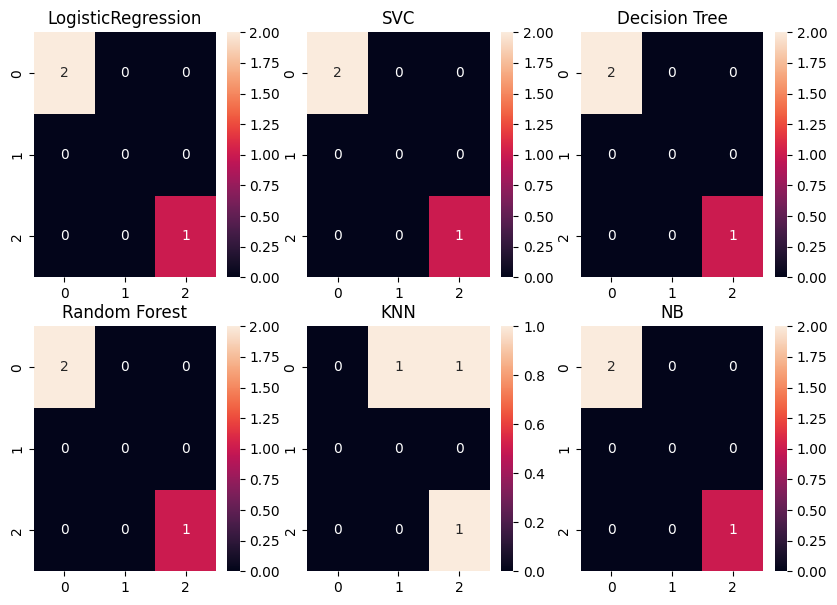

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10,7))
fig.subplots_adjust()
for i,model in enumerate([log_reg, svc, dtree, rforest, knn, nb],1):
    ax = fig.add_subplot(2, 3, i)
    model.fit(X_resamp, y_resamp)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
    ax = sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    title = ''
    if i == 1:
        title = 'LogisticRegression'
    elif i == 2:
        title = 'SVC'
    elif i == 3:
        title = 'Decision Tree'
    elif i == 4:
        title = 'Random Forest'
    elif i == 5:
        title = 'KNN'
    elif i == 6:
        title = 'NB'
        
    ax.set_title(title)
    


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 254, in predict
    probabilities = self.predict_proba(X)
                    ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311

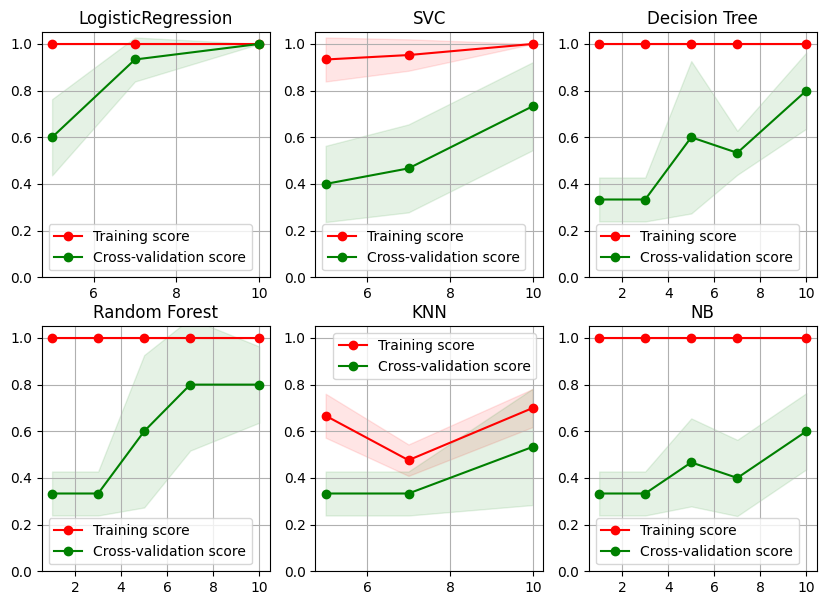

In [62]:
from sklearn.model_selection import learning_curve

fig = plt.figure(figsize=(10,7))
fig.subplots_adjust()
for i,model in enumerate([log_reg, svc, dtree, rforest, knn, nb],1):
    
    
    train_sizes, train_scores, test_scores, *_ = learning_curve(model, X_resamp, y_resamp, cv=cv)
    # Calculate the mean and standard deviation of the train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    
    ax = fig.add_subplot(2, 3, i)
    # Plot the learning curve
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.ylim([0, 1.05])
    title = ''
    if i == 1:
        title = 'LogisticRegression'
    elif i == 2:
        title = 'SVC'
    elif i == 3:
        title = 'Decision Tree'
    elif i == 4:
        title = 'Random Forest'
    elif i == 5:
        title = 'KNN'
    elif i == 6:
        title = 'NB'
        
    ax.set_title(title)
    


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Initialize the GridSearchCV
grid_search = GridSearchCV(rforest, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV
grid_search.fit(X_resamp, y_resamp)

# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.8666666666666667


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize the Logistic Regression
log_reg = LogisticRegression(random_state=0)

# Initialize the GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV
grid_search.fit(X_resamp, y_resamp)

# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Fitting 3 folds for each of 70 candidates, totalling 210 fits
Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 1.0


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
63 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.du

In [ ]:
best_model = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=0)